In [1]:
import json
import math
from statistics import mean
from statistics import stdev
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with open("sequences.json", 'r') as f:
    protein_sequence = json.load(f)
#protein_sequence

In [3]:
#Defines a new list for each subregion; Read as the first "TEN" percent, then "ten to TWENTY" percent, etc.
ten = []
twenty = []
thirty = []
forty = []
fifty = []
sixty = []
seventy = []
eighty = []
ninety = []
hundred = []

In [4]:
def sequenceDivider(sequence, initial, end, subregion):
    portion = sequence[initial:end]
    subregion.append(portion)

In [5]:
tracker = 0
methionine = []
for x in protein_sequence:
    count = 0
    for i in x:
        if i == 'M':
            count += 1
    if len(x)>10 and x != 'None' and count > 1:
        tracker += 1
        sub_seq = math.floor(len(x)/10)
        sequenceDivider(x, 1, sub_seq, ten)
        sequenceDivider(x, sub_seq + 1, 2 * sub_seq, twenty)
        sequenceDivider(x, (2 * sub_seq)+1, 3*sub_seq, thirty)
        sequenceDivider(x, (3*sub_seq)+1, 4*sub_seq, forty)
        sequenceDivider(x, (4*sub_seq)+1, 5*sub_seq, fifty)
        sequenceDivider(x, (5*sub_seq)+1, 6*sub_seq, sixty)
        sequenceDivider(x, (6*sub_seq)+1, 7*sub_seq, seventy)
        sequenceDivider(x, (7*sub_seq)+1, 8*sub_seq, eighty)
        sequenceDivider(x, (8*sub_seq)+1, 9*sub_seq, ninety)
        sequenceDivider(x, (9*sub_seq)+1, len(x), hundred)
    methionine.append(count)
print(tracker)
print(methionine)
print(mean(methionine))
print(stdev(methionine))

18257
[7, 3, 6, 1, 4, 2, 2, 4, 7, 7, 14, 9, 19, 8, 2, 1, 18, 7, 26, 2, 7, 9, 4, 41, 11, 9, 17, 10, 9, 2, 8, 2, 2, 13, 4, 6, 1, 7, 2, 61, 21, 15, 13, 12, 8, 10, 15, 27, 8, 36, 9, 27, 1, 3, 10, 41, 28, 8, 10, 9, 5, 11, 14, 21, 12, 4, 1, 4, 2, 5, 1, 10, 9, 12, 4, 10, 7, 15, 19, 13, 9, 46, 7, 9, 6, 13, 9, 18, 10, 10, 9, 5, 12, 10, 1, 8, 6, 8, 11, 6, 2, 7, 9, 18, 7, 5, 12, 15, 8, 15, 7, 18, 12, 31, 17, 10, 84, 6, 2, 7, 19, 5, 17, 6, 2, 5, 15, 3, 9, 6, 9, 8, 8, 13, 9, 12, 9, 8, 11, 8, 8, 8, 8, 7, 18, 10, 3, 3, 13, 7, 16, 27, 7, 9, 17, 3, 8, 4, 7, 29, 3, 5, 19, 15, 11, 18, 8, 19, 7, 1, 30, 7, 8, 18, 5, 3, 4, 4, 12, 8, 5, 6, 2, 4, 9, 20, 11, 15, 5, 8, 12, 4, 9, 22, 2, 11, 15, 9, 31, 8, 26, 16, 21, 8, 7, 6, 34, 17, 15, 3, 15, 22, 4, 12, 14, 6, 9, 7, 9, 16, 4, 11, 9, 3, 6, 29, 1, 14, 16, 8, 27, 7, 9, 12, 13, 4, 1, 17, 6, 16, 6, 3, 3, 9, 12, 5, 15, 8, 2, 8, 21, 1, 7, 47, 20, 13, 19, 8, 8, 68, 18, 16, 5, 9, 13, 6, 5, 12, 8, 2, 24, 15, 9, 11, 24, 11, 7, 5, 5, 6, 29, 8, 7, 3, 17, 18, 10, 16, 5, 3, 2

In [6]:
def methionineCounter(subregion, freq_range, number):
    for x in subregion:
        length = len(x)
        count = 0
        for i in x:
            if i == 'M':
                count += 1
        freq = count/len(x)
        freq_range.append(freq)

In [7]:
#Defines a new array for each range
zero_ten =[]
ten_twenty =[]
twenty_thirty =[]
thirty_forty =[]
forty_fifty=[]
fifty_sixty=[]
sixty_seventy=[]
seventy_eighty=[]
eighty_ninety=[]
ninety_hundred =[]

methionineCounter(ten, zero_ten, count)
methionineCounter(twenty, ten_twenty, count)
methionineCounter(thirty, twenty_thirty, count)
methionineCounter(forty, thirty_forty, count)
methionineCounter(fifty, forty_fifty, count)
methionineCounter(sixty, fifty_sixty, count)
methionineCounter(seventy, sixty_seventy, count)
methionineCounter(eighty, seventy_eighty, count)
methionineCounter(ninety, eighty_ninety, count)
methionineCounter(hundred, ninety_hundred, count)

In [8]:
freq = []
error = []
labels = ['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
x_pos = np.arange(len(labels))

In [9]:
def statGrabber(sequence_range):
    freq.append(np.mean(sequence_range))
    error.append(np.std(sequence_range))

In [10]:
statGrabber(zero_ten)
statGrabber(ten_twenty)
statGrabber(twenty_thirty)
statGrabber(thirty_forty)
statGrabber(forty_fifty)
statGrabber(fifty_sixty)
statGrabber(sixty_seventy)
statGrabber(seventy_eighty)
statGrabber(eighty_ninety)
statGrabber(ninety_hundred)

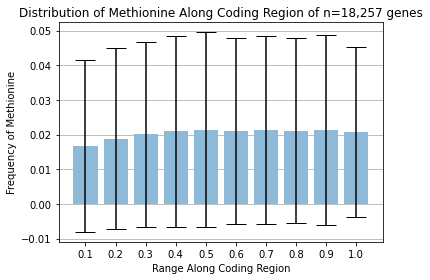

In [11]:
fig, ax = plt.subplots()
ax.bar(x_pos, freq, yerr = error, align = 'center', alpha = 0.5, ecolor = 'black', capsize = 10)
ax.set_ylabel('Frequency of Methionine')
ax.set_xlabel('Range Along Coding Region')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Distribution of Methionine Along Coding Region of n=18,257 genes')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('distribution.png')
plt.show()

In [12]:
freq

[0.016715733641422557,
 0.01885412684690486,
 0.02012851598352154,
 0.02100365465784373,
 0.021461363215816466,
 0.021044402291168277,
 0.021304783606985147,
 0.021131544769429907,
 0.0213363110581715,
 0.020701096977390355]

In [13]:
zero_ten

[0.0,
 0.0,
 0.02631578947368421,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.07142857142857142,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.058823529411764705,
 0.0,
 0.0,
 0.02040816326530612,
 0.0,
 0.0,
 0.022556390977443608,
 0.0,
 0.045454545454545456,
 0.038461538461538464,
 0.0,
 0.047619047619047616,
 0.0,
 0.02564102564102564,
 0.0,
 0.07142857142857142,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010230179028132993,
 0.09734513274336283,
 0.047619047619047616,
 0.016129032258064516,
 0.019230769230769232,
 0.08333333333333333,
 0.07894736842105263,
 0.0,
 0.008849557522123894,
 0.05555555555555555,
 0.006329113924050633,
 0.05,
 0.011764705882352941,
 0.0,
 0.0,
 0.029197080291970802,
 0.03676470588235294,
 0.025,
 0.02564102564102564,
 0.0,
 0.030303030303030304,
 0.05128205128205128,
 0.0,
 0.02127659574468085,
 0.01639344262295082,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0196078431372549,
 0.038461538461538464,
 0.03571428571428571,
 0.0,
 0.0,
 0.030303030303030304,
 0.0181818

In [15]:
count = 0
for x in zero_ten:
    if x == 0:
        count +=1
        
print(count)

9210


In [16]:
z = [zero_ten, ten_twenty, twenty_thirty, thirty_forty, forty_fifty, fifty_sixty, sixty_seventy, seventy_eighty, eighty_ninety, ninety_hundred]

In [18]:
for x in z:
    print(x[0])

0.0
0.0
0.0
0.0
0.037037037037037035
0.0
0.037037037037037035
0.0
0.037037037037037035
0.058823529411764705
